# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

## Perform API Call
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#Open Weather Map API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
#Empty list to hold API data 
response_json = []

#Loop for iterative API requests
for x in range(len(cities)):
    #Create a print log of each city as it's being processed
    print(f"Processing Record {x} | {cities[x]}")

    #API request
    response = requests.get(query_url + str(cities[x]))
    
    #Save to JSON
    response_json.append(response.json())

Processing Record 0 | albany
Processing Record 1 | teya
Processing Record 2 | sento se
Processing Record 3 | provideniya
Processing Record 4 | golden
Processing Record 5 | taolanaro
Processing Record 6 | takoradi
Processing Record 7 | sitka
Processing Record 8 | mataura
Processing Record 9 | cape town
Processing Record 10 | puerto ayora
Processing Record 11 | arlit
Processing Record 12 | sorvag
Processing Record 13 | saldanha
Processing Record 14 | iqaluit
Processing Record 15 | meuselwitz
Processing Record 16 | eyrarbakki
Processing Record 17 | mahebourg
Processing Record 18 | guerrero negro
Processing Record 19 | barrow
Processing Record 20 | kurara
Processing Record 21 | ushuaia
Processing Record 22 | illoqqortoormiut
Processing Record 23 | touros
Processing Record 24 | port alfred
Processing Record 25 | ozinki
Processing Record 26 | ballina
Processing Record 27 | matara
Processing Record 28 | busselton
Processing Record 29 | bethel
Processing Record 30 | hithadhoo
Processing Record

Processing Record 250 | tura
Processing Record 251 | morondava
Processing Record 252 | price
Processing Record 253 | nome
Processing Record 254 | manggar
Processing Record 255 | zhigansk
Processing Record 256 | north bend
Processing Record 257 | statesboro
Processing Record 258 | port shepstone
Processing Record 259 | opunake
Processing Record 260 | lagoa
Processing Record 261 | vangaindrano
Processing Record 262 | yeppoon
Processing Record 263 | torbay
Processing Record 264 | benguela
Processing Record 265 | kahului
Processing Record 266 | chagda
Processing Record 267 | acajutla
Processing Record 268 | vaitape
Processing Record 269 | progreso
Processing Record 270 | coquimbo
Processing Record 271 | amalapuram
Processing Record 272 | hanzhong
Processing Record 273 | college
Processing Record 274 | lolua
Processing Record 275 | manzanillo
Processing Record 276 | nalut
Processing Record 277 | pacific grove
Processing Record 278 | nukus
Processing Record 279 | hammerfest
Processing Record

Processing Record 497 | enshi
Processing Record 498 | invermere
Processing Record 499 | sidi ali
Processing Record 500 | terrace
Processing Record 501 | alugan
Processing Record 502 | otradnoye
Processing Record 503 | jinchang
Processing Record 504 | kalmunai
Processing Record 505 | kyakhta
Processing Record 506 | souillac
Processing Record 507 | tuy hoa
Processing Record 508 | taksimo
Processing Record 509 | langsa
Processing Record 510 | gumdag
Processing Record 511 | bethanien
Processing Record 512 | norman wells
Processing Record 513 | port hedland
Processing Record 514 | amahai
Processing Record 515 | saint-pierre
Processing Record 516 | nefteyugansk
Processing Record 517 | fairbanks
Processing Record 518 | rawlins
Processing Record 519 | iquitos
Processing Record 520 | ternate
Processing Record 521 | palabuhanratu
Processing Record 522 | skagastrond
Processing Record 523 | hovd
Processing Record 524 | sisimiut
Processing Record 525 | mocambique
Processing Record 526 | enid
Proces

In [5]:
#API request results
pprint(response_json)

[{'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 42.6, 'lon': -73.97},
  'dt': 1591708569,
  'id': 5106841,
  'main': {'feels_like': 62.82,
           'humidity': 57,
           'pressure': 1012,
           'temp': 63.64,
           'temp_max': 66,
           'temp_min': 62.01},
  'name': 'Albany',
  'sys': {'country': 'US',
          'id': 19530,
          'sunrise': 1591694290,
          'sunset': 1591749152,
          'type': 3},
  'timezone': -14400,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 35, 'speed': 0.74}},
 {'base': 'stations',
  'clouds': {'all': 36},
  'cod': 200,
  'coord': {'lat': 60.38, 'lon': 92.63},
  'dt': 1591708704,
  'id': 1489656,
  'main': {'feels_like': 47.21,
           'grnd_level': 989,
           'humidity': 59,
           'pressure': 1012,
           'sea_level': 1012,
           'temp': 53.26,
           'temp_max': 53.

           'sea_level': 1004,
           'temp': 84.52,
           'temp_max': 84.52,
           'temp_min': 84.52},
  'name': 'Kilinochchi',
  'sys': {'country': 'LK', 'sunrise': 1591661883, 'sunset': 1591707452},
  'timezone': 19800,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 206, 'speed': 12.39}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -35.72, 'lon': 150.18},
  'dt': 1591708710,
  'id': 2176639,
  'main': {'feels_like': 42.94,
           'humidity': 94,
           'pressure': 955,
           'temp': 46.72,
           'temp_max': 50,
           'temp_min': 44.01},
  'name': 'Batemans Bay',
  'sys': {'country': 'AU',
          'id': 2033442,
          'sunrise': 1591650291,
          'sunset': 1591685545,
          'type': 3},
  'timezone': 36000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
     

  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 110, 'speed': 5.28}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 98},
  'cod': 200,
  'coord': {'lat': -8.1, 'lon': 156.84},
  'dt': 1591708715,
  'id': 2108857,
  'main': {'feels_like': 90.52,
           'grnd_level': 1011,
           'humidity': 75,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 83.35,
           'temp_max': 83.35,
           'temp_min': 83.35},
  'name': 'Gizo Government Station',
  'sys': {'country': 'SB', 'sunrise': 1591731744, 'sunset': 1591773718},
  'timezone': 39600,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 22, 'speed': 5.23}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -23.12, 'lon': 

 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -24.87, 'lon': 113.63},
  'dt': 1591708720,
  'id': 2074865,
  'main': {'feels_like': 68.99,
           'grnd_level': 1017,
           'humidity': 51,
           'pressure': 1017,
           'sea_level': 1017,
           'temp': 72.91,
           'temp_max': 72.91,
           'temp_min': 72.91},
  'name': 'Carnarvon',
  'sys': {'country': 'AU', 'sunrise': 1591657565, 'sunset': 1591695818},
  'timezone': 28800,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 200, 'speed': 9.01}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 62.46, 'lon': -114.35},
  'dt': 1591708557,
  'id': 6185377,
  'main': {'feels_like': 26.64,
           'humidity': 86,
           'pressure': 1011,
           'temp': 38.82,
           'temp_max': 39.2,
           'temp_min': 37.99},
  'name': 'Yellowkn

  'sys': {'country': 'US',
          'id': 3538,
          'sunrise': 1591698885,
          'sunset': 1591755426,
          'type': 1},
  'timezone': -18000,
  'visibility': 6437,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 310, 'speed': 13.87}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 49.42, 'lon': 130.08},
  'dt': 1591708728,
  'id': 2027487,
  'main': {'feels_like': 55.17,
           'grnd_level': 987,
           'humidity': 65,
           'pressure': 1003,
           'sea_level': 1003,
           'temp': 62.29,
           'temp_max': 62.29,
           'temp_min': 62.29},
  'name': 'Arkhara',
  'sys': {'country': 'RU', 'sunrise': 1591643650, 'sunset': 1591701836},
  'timezone': 32400,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg':

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 75, 'speed': 3.29}},
 {'base': 'stations',
  'clouds': {'all': 95},
  'cod': 200,
  'coord': {'lat': 43.75, 'lon': -81.72},
  'dt': 1591708733,
  'id': 5962442,
  'main': {'feels_like': 60.13,
           'grnd_level': 992,
           'humidity': 70,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 62.42,
           'temp_max': 62.42,
           'temp_min': 62.42},
  'name': 'Goderich',
  'sys': {'country': 'CA', 'sunrise': 1591695901, 'sunset': 1591751262},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 172, 'speed': 5.46}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 62.88, 'lon': 152.43},
  'dt': 1591708733,
  'id': 2121373,
  'main': {'fee

           'pressure': 1011,
           'sea_level': 1011,
           'temp': 46.74,
           'temp_max': 46.74,
           'temp_min': 46.74},
  'name': 'Mugur-Aksy',
  'sys': {'country': 'RU', 'sunrise': 1591652871, 'sunset': 1591711615},
  'timezone': 25200,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 317, 'speed': 9.86}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 34.64, 'lon': -120.46},
  'dt': 1591708681,
  'id': 5367788,
  'main': {'feels_like': 43.36,
           'humidity': 93,
           'pressure': 1018,
           'temp': 47.12,
           'temp_max': 50,
           'temp_min': 44.6},
  'name': 'Lompoc',
  'sys': {'country': 'US',
          'id': 4747,
          'sunrise': 1591706912,
          'sunset': 1591758848,
          'type': 1},
  'timezone': -25200,
  'visibility': 16093,
  'weather': [{'description': 'clear sky',
 

           'sea_level': 1003,
           'temp': 51.57,
           'temp_max': 51.57,
           'temp_min': 51.57},
  'name': 'Rawson',
  'sys': {'country': 'AR', 'sunrise': 1591703323, 'sunset': 1591735861},
  'timezone': -10800,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 307, 'speed': 23.98}},
 {'base': 'stations',
  'clouds': {'all': 99},
  'cod': 200,
  'coord': {'lat': 11, 'lon': 122.67},
  'dt': 1591708742,
  'id': 1714733,
  'main': {'feels_like': 89.47,
           'grnd_level': 1006,
           'humidity': 81,
           'pressure': 1009,
           'sea_level': 1009,
           'temp': 80.65,
           'temp_max': 80.65,
           'temp_min': 80.65},
  'name': 'Dingle',
  'rain': {'1h': 0.17},
  'sys': {'country': 'PH', 'sunrise': 1591651567, 'sunset': 1591697475},
  'timezone': 28800,
  'weather': [{'description': 'light rain',
               'icon': '10n',
    

  'main': {'feels_like': 61.25,
           'grnd_level': 1024,
           'humidity': 69,
           'pressure': 1030,
           'sea_level': 1030,
           'temp': 63.45,
           'temp_max': 63.45,
           'temp_min': 63.45},
  'name': 'Lagoa',
  'sys': {'country': 'PT', 'sunrise': 1591683956, 'sunset': 1591737408},
  'timezone': 0,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 44, 'speed': 5.61}},
 {'base': 'stations',
  'clouds': {'all': 17},
  'cod': 200,
  'coord': {'lat': -23.35, 'lon': 47.6},
  'dt': 1591708746,
  'id': 1054329,
  'main': {'feels_like': 71.94,
           'grnd_level': 1021,
           'humidity': 86,
           'pressure': 1022,
           'sea_level': 1022,
           'temp': 70.23,
           'temp_max': 70.23,
           'temp_min': 70.23},
  'name': 'Vangaindrano',
  'rain': {'1h': 0.92},
  'sys': {'country': 'MG', 'sunrise': 1591673230, 'sunse

               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 255, 'gust': 5.01, 'speed': 1.01}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 46.42, 'lon': 3.91},
  'dt': 1591708750,
  'id': 2980080,
  'main': {'feels_like': 52.57,
           'humidity': 63,
           'pressure': 1016,
           'temp': 60.8,
           'temp_max': 60.8,
           'temp_min': 60.8},
  'name': 'Saint-François',
  'sys': {'country': 'FR',
          'id': 6499,
          'sunrise': 1591674727,
          'sunset': 1591731328,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 310, 'speed': 13.87}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 64.57, 'lon': 143.2},
  'dt': 1591708750,
  'id': 2120048,
  'main': {'feels_like': 51.01,
           'grn

           'temp_min': 51.8},
  'name': 'Yulara',
  'sys': {'country': 'AU',
          'id': 9487,
          'sunrise': 1591653443,
          'sunset': 1591691606,
          'type': 1},
  'timezone': 34200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 140, 'speed': 6.93}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 51.05, 'lon': 142.27},
  'dt': 1591708753,
  'id': 2123292,
  'main': {'feels_like': 44.94,
           'grnd_level': 1000,
           'humidity': 94,
           'pressure': 1007,
           'sea_level': 1007,
           'temp': 49.14,
           'temp_max': 49.14,
           'temp_min': 49.14},
  'name': 'Mgachi',
  'rain': {'1h': 0.28},
  'sys': {'country': 'RU', 'sunrise': 1591726610, 'sunset': 1591785846},
  'timezone': 39600,
  'weather': [{'description': 'light rain',
               'icon': '10n',
        

           'sea_level': 1016,
           'temp': 82.76,
           'temp_max': 82.76,
           'temp_min': 82.76},
  'name': 'Usinsk',
  'sys': {'country': 'RU', 'sunrise': 1591648940, 'sunset': 1591731374},
  'timezone': 10800,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 256, 'speed': 13.94}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 13.22, 'lon': -59.52},
  'dt': 1591708756,
  'id': 3374083,
  'main': {'feels_like': 88.57,
           'humidity': 70,
           'pressure': 1014,
           'temp': 86,
           'temp_max': 86,
           'temp_min': 86},
  'name': 'Bathsheba',
  'sys': {'country': 'BB',
          'id': 8772,
          'sunrise': 1591695057,
          'sunset': 1591741449,
          'type': 1},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',


           'humidity': 93,
           'pressure': 1024,
           'temp': 60.93,
           'temp_max': 61,
           'temp_min': 60.8},
  'name': 'Juventino Rosas',
  'sys': {'country': 'MX',
          'id': 7133,
          'sunrise': 1591704166,
          'sunset': 1591752252,
          'type': 1},
  'timezone': -18000,
  'visibility': 12874,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 150, 'speed': 5.82}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -46.28, 'lon': 169.85},
  'dt': 1591708759,
  'id': 2208248,
  'main': {'feels_like': 42.03,
           'humidity': 52,
           'pressure': 1004,
           'temp': 52,
           'temp_max': 52,
           'temp_min': 52},
  'name': 'Kaitangata',
  'sys': {'country': 'NZ',
          'id': 2031989,
          'sunrise': 1591733989,
          'sunset': 1591765227,
          'type': 3},
  

  'timezone': 7200,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 170, 'gust': 11.01, 'speed': 5.01}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -28.78, 'lon': 32.04},
  'dt': 1591708585,
  'id': 962367,
  'main': {'feels_like': 72.97,
           'grnd_level': 1017,
           'humidity': 45,
           'pressure': 1017,
           'sea_level': 1017,
           'temp': 78.8,
           'temp_max': 78.8,
           'temp_min': 78.8},
  'name': 'Richards Bay',
  'sys': {'country': 'ZA', 'sunrise': 1591677652, 'sunset': 1591714899},
  'timezone': 7200,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 39, 'speed': 13.49}},
 {'base': 'stations',
  'clouds': {'all': 62},
  'cod': 200,
  'coord': {'lat': 50.48, 'lon': 46.48},
  'dt': 1591708765,


  'dt': 1591708768,
  'id': 2013392,
  'main': {'feels_like': 53.46,
           'grnd_level': 987,
           'humidity': 80,
           'pressure': 998,
           'sea_level': 998,
           'temp': 57.38,
           'temp_max': 57.38,
           'temp_min': 57.38},
  'name': 'Vilyuysk',
  'rain': {'1h': 0.19},
  'sys': {'country': 'RU', 'sunrise': 1591637953, 'sunset': 1591711594},
  'timezone': 32400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 79, 'speed': 7.74}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 33.07, 'lon': -16.34},
  'dt': 1591708768,
  'id': 8010683,
  'main': {'feels_like': 61.93,
           'humidity': 60,
           'pressure': 1024,
           'temp': 68,
           'temp_max': 68,
           'temp_min': 68},
  'name': 'Porto Santo',
  'sys': {'country': 'PT',
          'id': 6902,
          'sunrise': 1591682173,
     

           'pressure': 1010,
           'sea_level': 1010,
           'temp': 89.67,
           'temp_max': 89.67,
           'temp_min': 89.67},
  'name': 'Lafia',
  'sys': {'country': 'NG', 'sunrise': 1591679232, 'sunset': 1591724610},
  'timezone': 3600,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 239, 'speed': 8.84}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 47.6, 'lon': -53.26},
  'dt': 1591708772,
  'id': 5895424,
  'main': {'feels_like': 38.43,
           'humidity': 100,
           'pressure': 1006,
           'temp': 44.29,
           'temp_max': 46.99,
           'temp_min': 42.01},
  'name': 'Bay Roberts',
  'sys': {'country': 'CA',
          'id': 554,
          'sunrise': 1591688143,
          'sunset': 1591745357,
          'type': 1},
  'timezone': -9000,
  'visibility': 3219,
  'weather': [{'description': 'light intensi

          'sunset': 1591766744,
          'type': 1},
  'timezone': -28800,
  'visibility': 16093,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 54, 'speed': 5.97}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 6.5, 'lon': 2.6},
  'dt': 1591708776,
  'id': 2392087,
  'main': {'feels_like': 82.56,
           'humidity': 65,
           'pressure': 1013,
           'temp': 82.4,
           'temp_max': 82.4,
           'temp_min': 82.4},
  'name': 'Porto-Novo',
  'sys': {'country': 'BJ',
          'id': 1119,
          'sunrise': 1591680860,
          'sunset': 1591725824,
          'type': 1},
  'timezone': 3600,
  'visibility': 8000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 70, 'speed': 12.75}},
 {'base': 'stations',
  'clouds': 

  'wind': {'deg': 208, 'speed': 6.62}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 21.46, 'lon': -71.14},
  'dt': 1591708780,
  'id': 3576994,
  'main': {'feels_like': 82.81,
           'grnd_level': 1014,
           'humidity': 79,
           'pressure': 1015,
           'sea_level': 1015,
           'temp': 80.44,
           'temp_max': 80.44,
           'temp_min': 80.44},
  'name': 'Cockburn Town',
  'sys': {'country': 'TC', 'sunrise': 1591696902, 'sunset': 1591745182},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 102, 'speed': 12.46}},
 {'base': 'stations',
  'clouds': {'all': 99},
  'cod': 200,
  'coord': {'lat': 65.85, 'lon': 44.24},
  'dt': 1591708780,
  'id': 527321,
  'main': {'feels_like': 75.02,
           'grnd_level': 1010,
           'humidity': 60,
           'pressure': 1012,
           'sea_level':

In [6]:
#Get dictionary keys
all_keys = set().union(*(d.keys() for d in response_json))

all_keys

{'base',
 'clouds',
 'cod',
 'coord',
 'dt',
 'id',
 'main',
 'message',
 'name',
 'rain',
 'sys',
 'timezone',
 'visibility',
 'weather',
 'wind'}

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Normalize JSON list of dictionaries
weather_df = pd.json_normalize(response_json)
weather_df.count()

weather            545
base               545
dt                 545
timezone           545
id                 545
name               545
cod                591
coord.lon          545
coord.lat          545
main.temp          545
main.feels_like    545
main.temp_min      545
main.temp_max      545
main.pressure      545
main.humidity      545
wind.speed         545
wind.deg           545
clouds.all         545
sys.type           275
sys.id             275
sys.country        545
sys.sunrise        545
sys.sunset         545
main.sea_level     270
main.grnd_level    270
message             46
visibility         231
wind.gust           33
rain.1h             60
dtype: int64

In [8]:
#Extract columns
new_weather_df = weather_df[["name",
                            "sys.country",
                            "coord.lat",
                            "coord.lon",
                            "dt",
                            "clouds.all",
                            "main.humidity",
                            "main.temp_max",
                            "wind.speed"]]

#Rename dataframe columns
new_weather_df = new_weather_df.rename(columns={"name":"City",
                                                "sys.country":"Country",
                                                "coord.lat":"Latitude",
                                                "coord.lon":"Longitude",
                                                "dt":"Date",
                                                "clouds.all":"Cloudiness",
                                                "main.humidity":"Humidity",
                                                "main.temp_max":"Max Temperature",
                                                "wind.speed":"Wind Speed"})
new_weather_df

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Albany,US,42.60,-73.97,1.591709e+09,0.0,57.0,66.00,0.74
1,Teya,RU,60.38,92.63,1.591709e+09,36.0,59.0,53.26,6.55
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Provideniya,RU,64.38,-173.30,1.591709e+09,0.0,65.0,46.06,6.96
4,Golden,US,39.76,-105.22,1.591708e+09,90.0,87.0,46.00,18.34
...,...,...,...,...,...,...,...,...,...
586,Rensvik,NO,63.10,7.82,1.591709e+09,20.0,54.0,55.40,8.05
587,Gunjur,GM,13.20,-16.73,1.591709e+09,75.0,62.0,87.80,11.41
588,Abu Dhabi,AE,24.47,54.37,1.591709e+09,20.0,50.0,96.80,10.29
589,Huarmey,PE,-10.07,-78.15,1.591709e+09,100.0,79.0,64.24,5.48


### Clean Dataframe

In [9]:
#Drop Missing Values
clean_weather = new_weather_df.dropna(how="any")

clean_weather

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Albany,US,42.60,-73.97,1.591709e+09,0.0,57.0,66.00,0.74
1,Teya,RU,60.38,92.63,1.591709e+09,36.0,59.0,53.26,6.55
3,Provideniya,RU,64.38,-173.30,1.591709e+09,0.0,65.0,46.06,6.96
4,Golden,US,39.76,-105.22,1.591708e+09,90.0,87.0,46.00,18.34
6,Takoradze,GH,4.88,-1.76,1.591709e+09,68.0,78.0,82.47,9.19
...,...,...,...,...,...,...,...,...,...
586,Rensvik,NO,63.10,7.82,1.591709e+09,20.0,54.0,55.40,8.05
587,Gunjur,GM,13.20,-16.73,1.591709e+09,75.0,62.0,87.80,11.41
588,Abu Dhabi,AE,24.47,54.37,1.591709e+09,20.0,50.0,96.80,10.29
589,Huarmey,PE,-10.07,-78.15,1.591709e+09,100.0,79.0,64.24,5.48


### Export data to CSV

In [10]:
clean_weather.to_csv(output_data_file, index=False, header=True)

# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

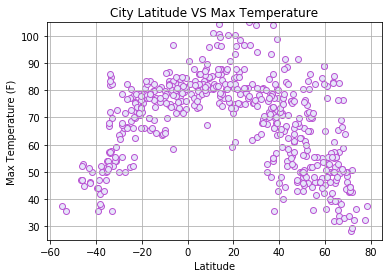

In [11]:
#Scatter plot data
latitude = clean_weather["Latitude"]
max_temp = clean_weather["Max Temperature"]

#Axes values
tempx_axis = np.arange(-60,80,1)
plt.ylim(25,105)

#Create scatter plot
plt.scatter(latitude, max_temp, marker = "o", facecolors = "lavender", edgecolors = "mediumorchid")
plt.grid()

#Scatter plot title and labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude VS Max Temperature")

#Save figure
plt.savefig("output_data/city_maxtemp")

plt.show()

#### Latitude vs. Humidity Plot

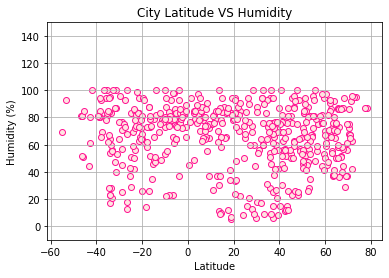

In [12]:
#Scatter plot data
humidity = clean_weather["Humidity"]

#Axes values
plt.ylim(-10,150)

#Create scatter plot
plt.scatter(latitude, humidity, marker = "o", facecolors = "mistyrose", edgecolors = "deeppink")
plt.grid()

#Scatter plot title and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude VS Humidity")

#Save figure
plt.savefig("output_data/city_humidity")

plt.show()

#### Latitude vs. Cloudiness Plot

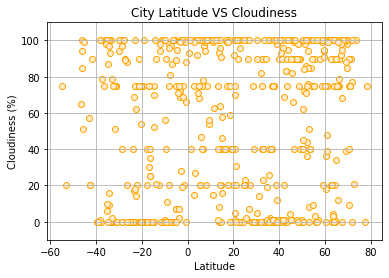

In [13]:
#Scatter plot data
cloudiness = clean_weather["Cloudiness"]

#Axes values
plt.ylim(-10,110)

#Create scatter plot
plt.scatter(latitude, cloudiness, marker = "o", facecolors = "blanchedalmond", edgecolors = "orange")
plt.grid()

#Scatter plot title and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude VS Cloudiness")

#Save figure
plt.savefig("output_data/city_cloudiness")

plt.show()

#### Latitude vs. Wind Speed Plot

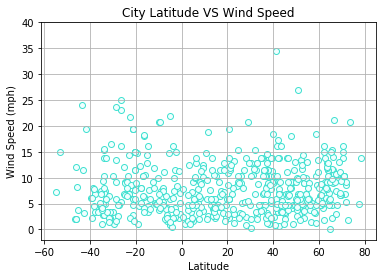

In [14]:
#Scatter plot data
wind_speed = clean_weather["Wind Speed"]

#Axes values
plt.ylim(-2,40)

#Create scatter plot
plt.scatter(latitude, wind_speed, marker = "o", facecolors = "azure", edgecolors = "turquoise")
plt.grid()

#Scatter plot title and labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude VS Wind Speed")

#Save figure
plt.savefig("output_data/city_windspeed")

plt.show()

## Linear Regression

#Create linear regression function

testx = 10,11,19,15,20
testy = 12,13,14,15,16

def linres(x_axis,y_axis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress({x_axis},{y_axis})
    regression = {x_axis} * slope + intercept
    plt.plot({x_axis}, regression, "b-")
    
linres(testx,testy)

In [15]:
# Create Northern and Southern Hemisphere DataFrames
clean_weather['Hemisphere'] = np.where(clean_weather['Latitude'] < 0, "Southern", "Northern")
hemispheres_df = clean_weather.set_index("Hemisphere").copy()

hemispheres_df

/Users/leishla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temperature,Wind Speed
Hemisphere,,,,,,,,,
Northern,Albany,US,42.60,-73.97,1.591709e+09,0.0,57.0,66.00,0.74
Northern,Teya,RU,60.38,92.63,1.591709e+09,36.0,59.0,53.26,6.55
Northern,Provideniya,RU,64.38,-173.30,1.591709e+09,0.0,65.0,46.06,6.96
Northern,Golden,US,39.76,-105.22,1.591708e+09,90.0,87.0,46.00,18.34
Northern,Takoradze,GH,4.88,-1.76,1.591709e+09,68.0,78.0,82.47,9.19
...,...,...,...,...,...,...,...,...,...
Northern,Rensvik,NO,63.10,7.82,1.591709e+09,20.0,54.0,55.40,8.05
Northern,Gunjur,GM,13.20,-16.73,1.591709e+09,75.0,62.0,87.80,11.41
Northern,Abu Dhabi,AE,24.47,54.37,1.591709e+09,20.0,50.0,96.80,10.29


In [16]:
#Create a dataframe for each hemisphere - Northern and Southern
north_hem_df = hemispheres_df.loc["Northern",:]
south_hem_df = hemispheres_df.loc["Southern",:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47683432005514526


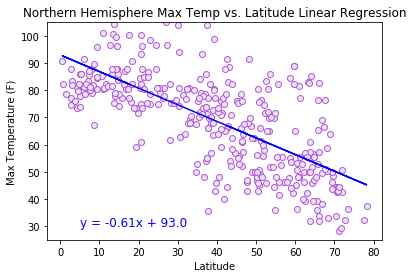

In [19]:
#Scatter plot data
north_latitude = north_hem_df["Latitude"]
north_temp = north_hem_df["Max Temperature"]

#Axes values
plt.ylim(25,105) 

#Create scatter plot
plt.scatter(north_latitude, north_temp, marker = "o", facecolors = "lavender", edgecolors = "mediumorchid")

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude,north_temp)
regression = north_latitude * slope + intercept
plt.plot(north_latitude, regression, "b-")

#R-squared value
print(f"The r-squared is: {rvalue**2}")

#Linear regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate plot
plt.annotate(line_eq,(5,30),fontsize=12,color="blue")

#Scatter plot title and labels
plt.title("Northern Hemisphere Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


#Save figure
plt.savefig("output_data/north_maxtemp")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5701743778640597


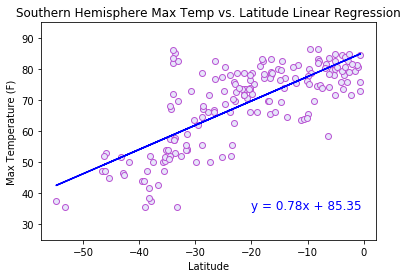

In [20]:
#Scatter plot data
south_latitude = south_hem_df["Latitude"]
south_temp = south_hem_df["Max Temperature"]

#Axes values
plt.ylim(25,95) 

#Create scatter plot
plt.scatter(south_latitude, south_temp, marker = "o", facecolors = "lavender", edgecolors = "mediumorchid")

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude,south_temp)
regression = south_latitude * slope + intercept
plt.plot(south_latitude, regression, "b-")

#Linear regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate plot
plt.annotate(line_eq,(-20,35),fontsize=12,color="blue")

#R-squared value
print(f"The r-squared is: {rvalue**2}")

#Scatter plot title and labels
plt.title("Southern Hemisphere Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Save figure
plt.savefig("output_data/south_maxtemp")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008196530231410084


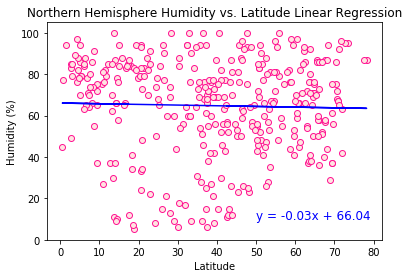

In [21]:
#Scatter plot data
north_humidity = north_hem_df["Humidity"]

#Axes values
plt.ylim(0,105) 

#Create scatter plot
plt.scatter(north_latitude, north_humidity, marker = "o", facecolors = "mistyrose", edgecolors = "deeppink")

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude,north_humidity)
regression = north_latitude * slope + intercept
plt.plot(north_latitude, regression, "b-")

#Linear regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate plot
plt.annotate(line_eq,(50,10),fontsize=12,color="blue")

#R-squared value
print(f"The r-squared is: {rvalue**2}")

#Scatter plot title and labels
plt.title("Northern Hemisphere Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Save figure
plt.savefig("output_data/north_humidity")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005413396468041517


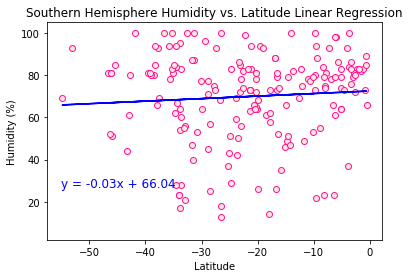

In [22]:
#Scatter plot data
south_humidity = south_hem_df["Humidity"]

#Axes values
plt.ylim(2,105) 

#Create scatter plot
plt.scatter(south_latitude, south_humidity, marker = "o", facecolors = "mistyrose", edgecolors = "deeppink")

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude,south_humidity)
regression = south_latitude * slope + intercept
plt.plot(south_latitude, regression, "b-")

#Annotate plot
plt.annotate(line_eq,(-55,27),fontsize=12,color="blue")

#Linear regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#R-squared value
print(f"The r-squared is: {rvalue**2}")

#Scatter plot title and labels
plt.title("Southern Hemisphere Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Save figure
plt.savefig("output_data/south_humidity")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0015334455516949482


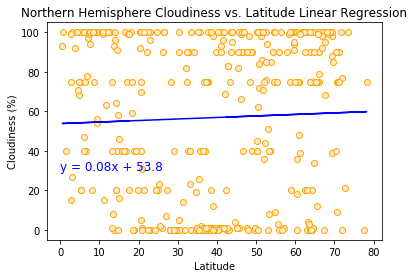

In [23]:
#Scatter plot data
north_cloudiness = north_hem_df["Cloudiness"]

#Axes values
plt.ylim(-5,105) 

#Create scatter plot
plt.scatter(north_latitude, north_cloudiness, marker = "o", facecolors = "blanchedalmond", edgecolors = "orange")

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude,north_cloudiness)
regression = north_latitude * slope + intercept
plt.plot(north_latitude, regression, "b-")

#Linear regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate plot
plt.annotate(line_eq,(0,30),fontsize=12,color="blue")

#R-squared value
print(f"The r-squared is: {rvalue**2}")

#Scatter plot title and labels
plt.title("Northern Hemisphere Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Save figure
plt.savefig("output_data/north_cloudiness")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0035700264436631045


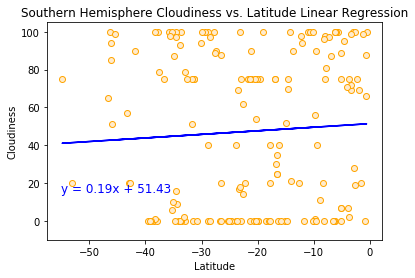

In [24]:
#Scatter plot data
south_cloudiness = south_hem_df["Cloudiness"]

#Axes values
plt.ylim(-10,105) 

#Create scatter plot
plt.scatter(south_latitude, south_cloudiness, marker = "o", facecolors = "blanchedalmond", edgecolors = "orange")

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude,south_cloudiness)
regression = south_latitude * slope + intercept
plt.plot(south_latitude, regression, "b-")

#Linear regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate plot
plt.annotate(line_eq,(-55,15),fontsize=12,color="blue")

#R-squared value
print(f"The r-squared is: {rvalue**2}")

#Scatter plot title and labels
plt.title("Southern Hemisphere Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Save figure
plt.savefig("output_data/south_cloudiness")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026795477443511


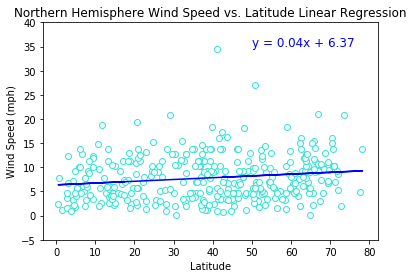

In [25]:
#Scatter plot data
north_wind = north_hem_df["Wind Speed"]

#Axes values
plt.ylim(-5,40) 

#Create scatter plot
plt.scatter(north_latitude, north_wind, marker = "o", facecolors = "azure", edgecolors = "turquoise")

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude,north_wind)
regression = north_latitude * slope + intercept
plt.plot(north_latitude, regression, "b-")

#Linear regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate plot
plt.annotate(line_eq,(50,35),fontsize=12,color="blue")

#R-squared value
print(f"The r-squared is: {rvalue**2}")

#Scatter plot title and labels
plt.title("Northern Hemisphere Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Save figure
plt.savefig("output_data/north_wind")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003315993868505838


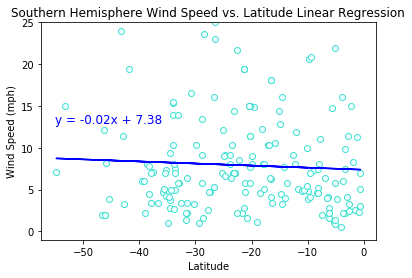

In [26]:
#Scatter plot data
south_wind = south_hem_df["Wind Speed"]

#Axes values
plt.ylim(-1,25) 

#Create scatter plot
plt.scatter(south_latitude, south_wind, marker = "o", facecolors = "azure", edgecolors = "turquoise")

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude,south_wind)
regression = south_latitude * slope + intercept
plt.plot(south_latitude, regression, "b-")

#Linear regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate plot
plt.annotate(line_eq,(-55,13),fontsize=12,color="blue")

#R-squared value
print(f"The r-squared is: {rvalue**2}")

#Scatter plot title and labels
plt.title("Southern Hemisphere Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Save figure
plt.savefig("output_data/south_wind")

plt.show()